In [20]:
path = 'https://raw.githubusercontent.com/LunusMax/football-data/refs/heads/main/Laterais_Brasileirao/laterais_flamengo.csv'

In [21]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [22]:
data = pd.read_csv(path, sep=';')

In [23]:
data.head()

,Jogador,Minutos,TklW,Int,Blocks,PassBlocks,Cmp,Cmp%,PrgC,PrgP,PPA,Crosses,SCA,CrsPA,GCA
0,Alex Sandro,959,5,14,11,7,688,88.7,24,89,9,17,24,3,2
1,Ayrton Lucas,527,14,3,3,3,387,91.7,16,44,4,8,15,3,1
2,Matías Vina,199,3,1,2,2,127,84.1,8,12,2,5,5,0,1


In [24]:
data.rename(columns={'Minutos': 'Minutes'}, inplace=True)

In [25]:
# Métricas por 90 minutos
data['TklW/90'] = (data['TklW'] * 90) / (data['Minutes'])
data['Int/90'] = (data['Int'] * 90) / (data['Minutes'])
data['Cmp/90'] = (data['Cmp'] * 90) / (data['Minutes'])
data['Blocks/90'] = (data['Blocks'] * 90) / (data['Minutes'])
data['PassBlocks/90'] = (data['PassBlocks'] * 90) / (data['Minutes'])
data['PrgC/90'] = (data['PrgC'] * 90) / (data['Minutes'])
data['PrgP/90'] = (data['PrgP'] * 90) / (data['Minutes'])
data['PPA/90'] = (data['PPA'] * 90) / (data['Minutes'])
data['Crosses/90'] = (data['Crosses'] * 90) / (data['Minutes'])
data['SCA/90'] = (data['SCA'] * 90) / (data['Minutes'])
data['CrsPA/90'] = (data['CrsPA'] * 90) / (data['Minutes'])
data['GCA/90'] = (data['GCA'] * 90) / (data['Minutes'])

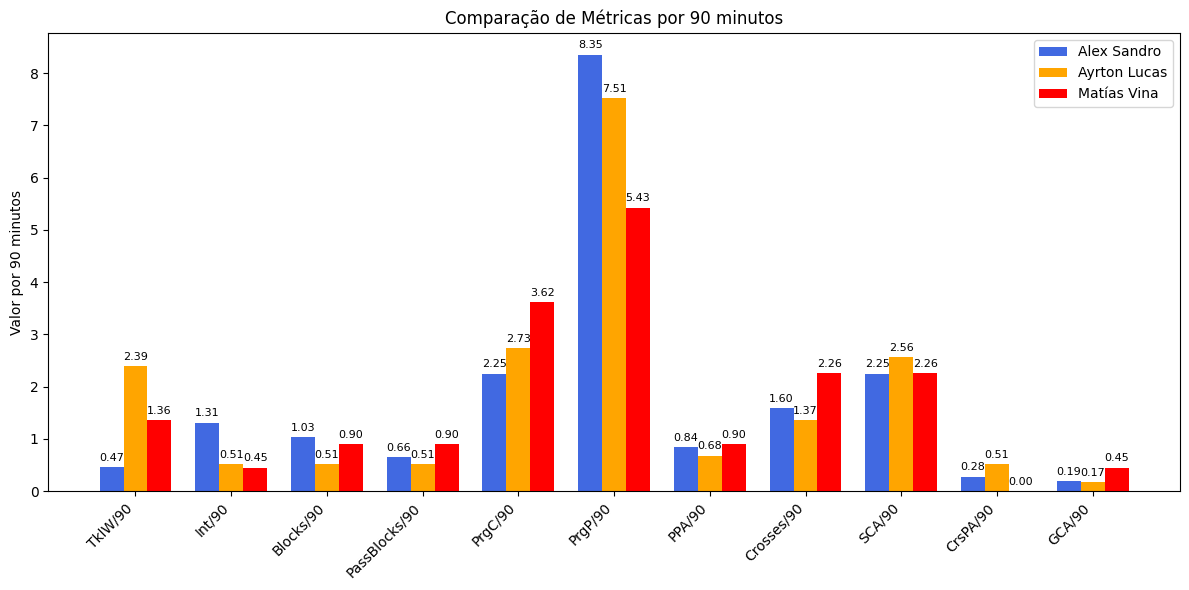

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Suponha que 'data' seja um DataFrame com os dados dos jogadores
# E que a coluna 'Jogador' identifique cada jogador

# Nomes dos jogadores
jogador_1 = 'Alex Sandro'
jogador_2 = 'Ayrton Lucas'
jogador_3 = 'Matías Vina'

# Métricas a comparar
metricas = [
    'TklW/90', 'Int/90', 'Blocks/90', 'PassBlocks/90',
    'PrgC/90', 'PrgP/90', 'PPA/90', 'Crosses/90', 'SCA/90', 'CrsPA/90', 'GCA/90'
]

# Extrair os dados de cada jogador
dados_1 = data[data['Jogador'] == jogador_1][metricas].iloc[0]
dados_2 = data[data['Jogador'] == jogador_2][metricas].iloc[0]
dados_3 = data[data['Jogador'] == jogador_3][metricas].iloc[0]

# Configurar gráfico
x = np.arange(len(metricas))  # posição no eixo x
largura = 0.25  # largura das barras

fig, ax = plt.subplots(figsize=(12, 6))

# Barras
bar1 = ax.bar(x - largura, dados_1, width=largura, label=jogador_1, color='royalblue')
bar2 = ax.bar(x, dados_2, width=largura, label=jogador_2, color='orange')
bar3 = ax.bar(x + largura, dados_3, width=largura, label=jogador_3, color='red')

# Ajustes de layout
ax.set_ylabel('Valor por 90 minutos')
ax.set_title('Comparação de Métricas por 90 minutos')
ax.set_xticks(x)
ax.set_xticklabels(metricas, rotation=45, ha='right')
ax.legend()

# Função para adicionar valores nas barras
def adicionar_valores(barras):
    for barra in barras:
        altura = barra.get_height()
        ax.annotate(f'{altura:.2f}',
                    xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3),  # deslocamento vertical
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# Adiciona os valores
adicionar_valores(bar1)
adicionar_valores(bar2)
adicionar_valores(bar3)

plt.tight_layout()
plt.show()


In [27]:
data['Cmp%'] = data['Cmp%'] / 100

In [28]:
data.columns

Index(['Jogador', 'Minutes', 'TklW', 'Int', 'Blocks', 'PassBlocks', 'Cmp',
       'Cmp%', 'PrgC', 'PrgP', 'PPA', 'Crosses', 'SCA', 'CrsPA', 'GCA',
       'TklW/90', 'Int/90', 'Cmp/90', 'Blocks/90', 'PassBlocks/90', 'PrgC/90',
       'PrgP/90', 'PPA/90', 'Crosses/90', 'SCA/90', 'CrsPA/90', 'GCA/90'],
      dtype='object')

In [29]:
# Criando Métricas

# Defesa: tackles + interceptações + blocks + pass blocks
data['def_score'] = (
    data['TklW/90'] +
    data['Int/90'] +
    data['Blocks/90'] +
    data['PassBlocks/90']
)

# Construção: progressões de passe + passes para a área
data['build_score'] = (
    data['PrgP/90'] +
    data['PPA/90']
)

# Ataque: criação de chances + conduções + cruzamentos para a área
data['att_score'] = (
    data['SCA/90'] +
    data['PrgC/90'] +
    data['CrsPA/90'] +
    data['GCA/90']
)

# Score final simples (sem pesos por enquanto)
data['fba_score'] = data['def_score'] + data['build_score'] + data['att_score']

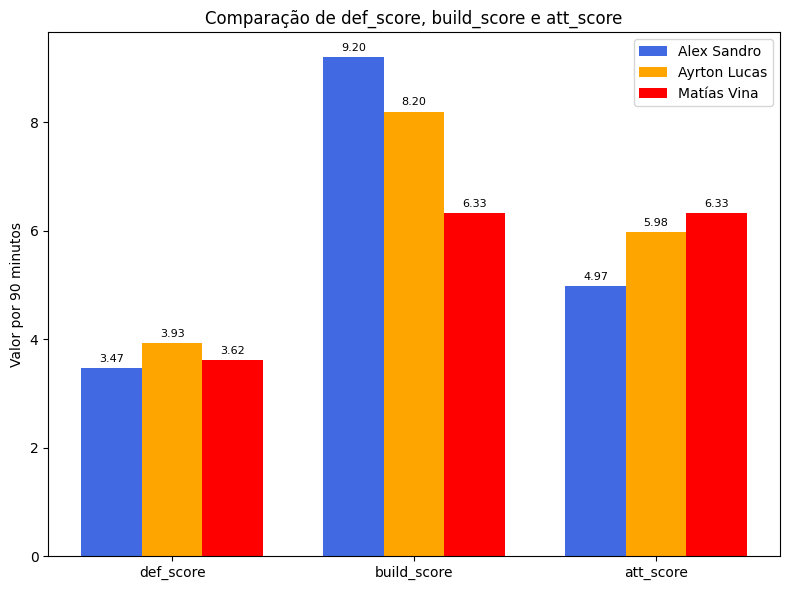

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Nomes dos jogadores
jogador_1 = 'Alex Sandro'
jogador_2 = 'Ayrton Lucas'
jogador_3 = 'Matías Vina'

# Métricas a comparar
metricas = ['def_score', 'build_score', 'att_score']

# Extrair os dados dos jogadores
dados_1 = data[data['Jogador'] == jogador_1][metricas].iloc[0]
dados_2 = data[data['Jogador'] == jogador_2][metricas].iloc[0]
dados_3 = data[data['Jogador'] == jogador_3][metricas].iloc[0]

# Configurar gráfico
x = np.arange(len(metricas))  # posições no eixo x
largura = 0.25  # largura das barras

fig, ax = plt.subplots(figsize=(8, 6))

# Barras
bar1 = ax.bar(x - largura, dados_1, width=largura, label=jogador_1, color='royalblue')
bar2 = ax.bar(x, dados_2, width=largura, label=jogador_2, color='orange')
bar3 = ax.bar(x + largura, dados_3, width=largura, label=jogador_3, color='red')

# Ajustes de layout
ax.set_title('Comparação de def_score, build_score e att_score')
ax.set_ylabel('Valor por 90 minutos')
ax.set_xticks(x)
ax.set_xticklabels(metricas, rotation=0, ha='center')
ax.legend()

# Função para adicionar valores nas barras
def adicionar_valores(barras):
    for barra in barras:
        altura = barra.get_height()
        ax.annotate(f'{altura:.2f}',
                    xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# Adiciona os valores numéricos em cada barra
adicionar_valores(bar1)
adicionar_valores(bar2)
adicionar_valores(bar3)

plt.tight_layout()
plt.show()

/tmp/ipython-input-2332749094.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = cm.get_cmap("RdYlGn", 256)


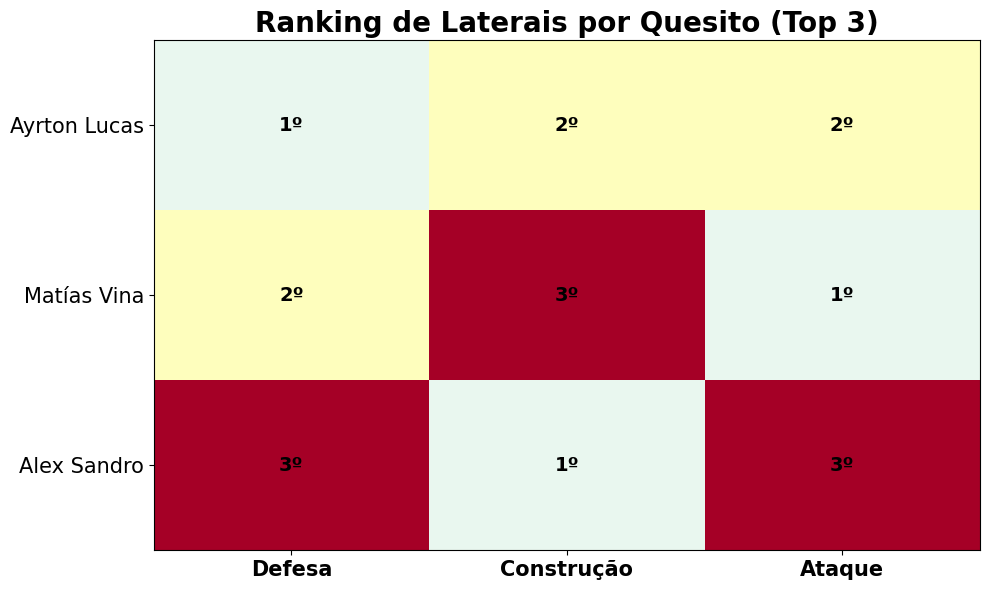

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

# Filtra só os 3 jogadores de interesse
jogadores = ['Alex Sandro', 'Ayrton Lucas', 'Matías Vina']
data_filtrada = data[data['Jogador'].isin(jogadores)].copy()

# --- ranking para laterais ---
data_filtrada['rank_def']   = data_filtrada['def_score'].rank(ascending=False, method='min')
data_filtrada['rank_build'] = data_filtrada['build_score'].rank(ascending=False, method='min')
data_filtrada['rank_att']   = data_filtrada['att_score'].rank(ascending=False, method='min')

data_filtrada['rank_overall'] = (
    data_filtrada['rank_def'] + data_filtrada['rank_build'] + data_filtrada['rank_att']
).rank(method='min')

# ordena pela posição no ranking geral
order = data_filtrada.sort_values("rank_overall")["Jogador"].tolist()
idxd  = data_filtrada.set_index("Jogador").reindex(order)

def percent_rank_from_rank(series):
    r = series.astype(float).values
    n = len(r)
    return np.ones_like(r) if n <= 1 else 1.0 - (r - 1.0) / (n - 1.0)

# matriz de valores normalizados (0–1) para heatmap
vals = np.c_[
    percent_rank_from_rank(idxd["rank_def"]),
    percent_rank_from_rank(idxd["rank_build"]),
    percent_rank_from_rank(idxd["rank_att"]),
]

# rótulos com posição ordinal (ex.: "2º")
labels = np.c_[
    idxd["rank_def"].astype(int).astype(str)   + "º",
    idxd["rank_build"].astype(int).astype(str) + "º",
    idxd["rank_att"].astype(int).astype(str)   + "º",
]

cols = ["Defesa", "Construção", "Ataque"]

# colormap (melhor rank = verde claro)
base = cm.get_cmap("RdYlGn", 256)
colors = base(np.linspace(0, 1, 256))
colors[-1, :] = np.array([233/255, 247/255, 239/255, 1.0])
custom_cmap = ListedColormap(colors)

# fontes
FS_TITLE = 20
FS_TICKS = 15
FS_CELLS = 14

# plot
fig, ax = plt.subplots(figsize=(10, max(6, 0.45*len(order))))
im = ax.imshow(vals, aspect="auto", cmap=custom_cmap, vmin=0, vmax=1)

# ticks e labels
ax.set_xticks(range(len(cols)))
ax.set_xticklabels(cols, fontsize=FS_TICKS, fontweight="bold")
ax.set_yticks(range(len(order)))
ax.set_yticklabels(order, fontsize=FS_TICKS)

# rótulos nas células
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        ax.text(j, i, labels[i, j], ha="center", va="center",
                fontsize=FS_CELLS, fontweight="bold")

ax.set_title("Ranking de Laterais por Quesito (Top 3)", fontsize=FS_TITLE, fontweight="bold")

plt.tight_layout()
plt.savefig("heatmap_laterais_top3.png", dpi=150)
plt.show()
